In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras import Sequential

from keras import layers
import keras
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Activation
from keras.layers import Dropout
import pickle
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import keras.backend as K
#from keras.backend import ModelCheckpoint

2024-05-23 18:37:38.514918: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 18:37:38.514980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 18:37:38.549046: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 18:37:38.619584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 18:37:39.877923: W tensorflow/compiler/tf2

In [2]:
prefolder = "/mnt/e/UnderwaterMonitoring/lstm/pilotData/55555/"
#prefolder = "E:\\UnderwaterMonitoring\\lstm\\pilotData\\55555\\"
fileName = prefolder + "xInputSegments.csv"
xInputSegments = pd.read_csv(fileName, header=None)
xInputSegments = xInputSegments.to_numpy()

fileName = prefolder + "yInputSegments.csv"
yInputSegments = pd.read_csv(fileName, header=None)
yInputSegments = yInputSegments.to_numpy()

fileName = prefolder + "zInputSegments.csv"
zInputSegments = pd.read_csv(fileName, header=None)
zInputSegments = zInputSegments.to_numpy()

fileName = prefolder + "swarmParams.csv"
inputSwarmParams = pd.read_csv(fileName, header=None)
inputSwarmParams = inputSwarmParams.to_numpy()

fileName = prefolder + "xOutput.csv"
xOutput = pd.read_csv(fileName, header=None)
xOutput = xOutput.to_numpy()

fileName = prefolder + "yOutput.csv"
yOutput = pd.read_csv(fileName, header=None)
yOutput = yOutput.to_numpy()

fileName = prefolder + "zOutput.csv"
zOutput = pd.read_csv(fileName, header=None)
zOutput = zOutput.to_numpy()

In [3]:
inputSegments1 = np.dstack([xInputSegments,zInputSegments])
output = np.dstack([xOutput, zOutput])
inputSegments2 = inputSwarmParams

In [4]:
inputSegments1[0,:,1]

array([-0.83466309, -0.82617262, -0.81652586, -0.80555248, -0.79982993,
       -0.79196445, -0.78324604, -0.77218315, -0.76607284, -0.75763049,
       -0.74900143, -0.73808933, -0.73201571, -0.72354605, -0.71481809,
       -0.70378686, -0.69787529, -0.68934753, -0.68075132, -0.66966181,
       -0.66367343, -0.65519303, -0.64654289, -0.63559555, -0.62946501,
       -0.62079217, -0.61215979, -0.60109109, -0.59499725, -0.58637416,
       -0.57770858, -0.5662069 , -0.56063564, -0.55220217, -0.54351739,
       -0.53251432, -0.52652177, -0.51808053, -0.50943091, -0.49841717,
       -0.49234047, -0.48385725, -0.47515003, -0.46414465, -0.45806642,
       -0.44949437, -0.4407752 , -0.42966017, -0.42371037, -0.4151308 ,
       -0.40667233, -0.3953612 , -0.3893608 , -0.38112078, -0.37251152,
       -0.36131969, -0.35520033, -0.34674236, -0.3379766 , -0.32699691,
       -0.32095384, -0.31264905, -0.30406531, -0.29319843, -0.28708556,
       -0.27874245, -0.27018448, -0.25933356, -0.25329774, -0.24

In [5]:
xInputSegments[0,:]

array([-0.98072476, -0.98081878, -0.98092564, -0.98104758, -0.98111112,
       -0.9811984 , -0.98129499, -0.9814179 , -0.98148561, -0.98157931,
       -0.98167493, -0.98179591, -0.9818633 , -0.98195732, -0.98205423,
       -0.98217649, -0.98224228, -0.98233694, -0.98243225, -0.98255547,
       -0.98262158, -0.98271592, -0.98281187, -0.98293317, -0.9830012 ,
       -0.98309746, -0.98319309, -0.98331599, -0.9833837 , -0.98347933,
       -0.9835756 , -0.98370299, -0.98376493, -0.98385831, -0.9839549 ,
       -0.98407684, -0.98414358, -0.98423696, -0.98433291, -0.98445517,
       -0.98452288, -0.98461691, -0.98471349, -0.98483544, -0.98490314,
       -0.98499813, -0.98509472, -0.98521826, -0.98528405, -0.98537935,
       -0.98547305, -0.98559852, -0.98565179, -0.9857102 , -0.98573972,
       -0.98572111, -0.98565725, -0.98552279, -0.98530619, -0.98494903,
       -0.98470547, -0.98434093, -0.98393179, -0.98338563, -0.98307115,
       -0.98264211, -0.98220184, -0.98164349, -0.98133318, -0.98

In [6]:
randInd = np.random.permutation(inputSegments1.shape[0])
inputSegments1_shuffled = np.array(inputSegments1, copy=True)
inputSegments2_shuffled = np.array(inputSegments2, copy=True)
output_shuffled = np.array(output, copy=True)
np.take(inputSegments1,randInd,axis=0,out=inputSegments1_shuffled)
np.take(inputSegments2,randInd,axis=0,out=inputSegments2_shuffled)
np.take(output,randInd,axis=0,out=output_shuffled)

array([[[ 0.6544875 , -0.38491477],
        [ 0.6512763 , -0.38603965],
        [ 0.64717686, -0.38747575],
        ...,
        [ 0.3433057 , -0.37516757],
        [ 0.33926049, -0.37254582],
        [ 0.33701871, -0.37109274]],

       [[-0.38048499,  0.28359656],
        [-0.37650588,  0.28054908],
        [-0.37432925,  0.2788824 ],
        ...,
        [-0.08899055, -0.01656963],
        [-0.08693833, -0.01919078],
        [-0.08405206, -0.02287756]],

       [[-0.13327508,  0.06922771],
        [-0.13543423,  0.06986055],
        [-0.13864633,  0.07067848],
        ...,
        [-0.42470569, -0.17605733],
        [-0.42754401, -0.17970505],
        [-0.43048502, -0.1834848 ]],

       ...,

       [[ 0.53571793, -0.40308835],
        [ 0.53145868, -0.40345282],
        [ 0.52916203, -0.40361316],
        ...,
        [ 0.22764105, -0.29026897],
        [ 0.22550501, -0.28819969],
        [ 0.22248798, -0.28527723]],

       [[-0.22207342,  0.14049142],
        [-0.2181813 ,  0.13

In [7]:
inputSegments1[1,:,0]

array([-0.98081878, -0.98092564, -0.98104758, -0.98111112, -0.9811984 ,
       -0.98129499, -0.9814179 , -0.98148561, -0.98157931, -0.98167493,
       -0.98179591, -0.9818633 , -0.98195732, -0.98205423, -0.98217649,
       -0.98224228, -0.98233694, -0.98243225, -0.98255547, -0.98262158,
       -0.98271592, -0.98281187, -0.98293317, -0.9830012 , -0.98309746,
       -0.98319309, -0.98331599, -0.9833837 , -0.98347933, -0.9835756 ,
       -0.98370299, -0.98376493, -0.98385831, -0.9839549 , -0.98407684,
       -0.98414358, -0.98423696, -0.98433291, -0.98445517, -0.98452288,
       -0.98461691, -0.98471349, -0.98483544, -0.98490314, -0.98499813,
       -0.98509472, -0.98521826, -0.98528405, -0.98537935, -0.98547305,
       -0.98559852, -0.98565179, -0.9857102 , -0.98573972, -0.98572111,
       -0.98565725, -0.98552279, -0.98530619, -0.98494903, -0.98470547,
       -0.98434093, -0.98393179, -0.98338563, -0.98307115, -0.98264211,
       -0.98220184, -0.98164349, -0.98133318, -0.98090254, -0.98

In [8]:
inputSegments2[0,:]

array([  5. ,   0.1, 100. ,   0.5])

In [9]:
inputSegments1.shape

(4533, 100, 2)

In [10]:
inputSegments1[262,:,1]

array([0.29876294, 0.29742805, 0.29664468, 0.29546706, 0.29424933,
       0.29270195, 0.29186072, 0.29064718, 0.2894524 , 0.28790545,
       0.28704664, 0.28583463, 0.28463457, 0.2830528 , 0.28215645,
       0.28090382, 0.27952463, 0.27761262, 0.27635368, 0.27452299,
       0.27275263, 0.27022493, 0.2688239 , 0.26683116, 0.26481863,
       0.26220294, 0.26080132, 0.25875704, 0.25673563, 0.25416893,
       0.25274238, 0.25074393, 0.24872098, 0.24611827, 0.24470939,
       0.24265888, 0.24061511, 0.23794891, 0.23639675, 0.23405926,
       0.23165658, 0.22859143, 0.2268768 , 0.22441737, 0.22193924,
       0.21870164, 0.21693598, 0.21446255, 0.21183799, 0.20825666,
       0.20624779, 0.20346024, 0.20055655, 0.19682469, 0.19479133,
       0.19188346, 0.18899701, 0.18525679, 0.18319791, 0.18029576,
       0.17737961, 0.17365612, 0.17161542, 0.16872479, 0.1658164 ,
       0.16210118, 0.16005588, 0.15718342, 0.15427453, 0.1505192 ,
       0.14845358, 0.14554938, 0.1425805 , 0.1388081 , 0.13677

In [11]:
inputSegments1

array([[[-9.80724762e-01, -8.34663092e-01],
        [-9.80818784e-01, -8.26172618e-01],
        [-9.80925643e-01, -8.16525857e-01],
        ...,
        [-9.51059565e-01, -2.17598687e-02],
        [-9.49286938e-01, -1.46497709e-02],
        [-9.46943116e-01, -5.24757980e-03]],

       [[-9.80818784e-01, -8.26172618e-01],
        [-9.80925643e-01, -8.16525857e-01],
        [-9.81047583e-01, -8.05552481e-01],
        ...,
        [-9.49286938e-01, -1.46497709e-02],
        [-9.46943116e-01, -5.24757980e-03],
        [-9.45688414e-01, -2.77935529e-04]],

       [[-9.80925643e-01, -8.16525857e-01],
        [-9.81047583e-01, -8.05552481e-01],
        [-9.81111120e-01, -7.99829928e-01],
        ...,
        [-9.46943116e-01, -5.24757980e-03],
        [-9.45688414e-01, -2.77935529e-04],
        [-9.43940496e-01,  6.57351233e-03]],

       ...,

       [[-6.50215096e-02,  8.49645156e-01],
        [-6.25450618e-02,  8.55091225e-01],
        [-6.00407923e-02,  8.60448545e-01],
        ...,
     

In [12]:
output.shape

(4533, 100, 2)

In [13]:
type(output)

numpy.ndarray

In [9]:
input1 = keras.layers.Input(shape=(100,2 ))
x1 = LSTM(256, activation='tanh',return_sequences=True)(input1)
x1 = LSTM(128, activation='tanh',return_sequences=False)(x1)
x1 = keras.layers.Flatten()(x1)
x1 = Dense(128,activation=keras.activations.tanh)(x1)
#x1 = Dense(8,activation=keras.activations.tanh)(x1)

input2 =  keras.layers.Input(shape=(7, ))
x2 = Dense(32,activation=keras.activations.tanh)(input2)
x2 = Dense(8,activation=keras.activations.tanh)(x2)

merged = keras.layers.Concatenate(axis=1)([x1, x2])
merged = keras.layers.Flatten()(merged)
x3 = Dense(256,activation=keras.activations.tanh)(merged)
x3 = Dense(300,activation=keras.activations.tanh)(x3)

output1 = keras.layers.Reshape((100,2))(x3)

mlModel = keras.Model(inputs=[input1, input2], outputs=output1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.2)
mlModel.compile(loss='mse',optimizer =optimizer,metrics=['accuracy'])

2024-05-21 15:39:45.567915: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 15:39:45.690831: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 15:39:45.691137: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 15:39:45.693565: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 15:39:45.693875: I external/local_xla/xla/stream_executor

ValueError: Exception encountered when calling layer "reshape" (type Reshape).

total size of new array must be unchanged, input_shape = [300], output_shape = [100, 2]

Call arguments received by layer "reshape" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 300), dtype=float32)

In [14]:
def focal_loss(y_true, y_pred):
    #pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    #pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    #custom_loss=K.square((pt_1-pt_0)/10)
    loss1 = K.mean(K.square(y_true[:,:,0] - y_pred[:,:,0]), axis=-1)
    #loss2 = K.mean(K.square(y_true[:,:,1] - y_pred[:,:,1]), axis=-1)
    loss3 = K.mean(K.square(y_true[:,:,1] - y_pred[:,:,1]), axis=-1)
    meanLoss = 1*loss1+20*loss3
    #tf.print(meanLoss)
    return meanLoss

In [15]:
input1 = keras.layers.Input(shape=(100,2 ))
x1 = Bidirectional(LSTM(200, activation='tanh', return_sequences=True))(input1)
x1 = Bidirectional(LSTM(200, activation='tanh',return_sequences=False))(x1)
#x1 = Bidirectional(LSTM(200, activation='tanh',return_sequences=False))(x1)

input2 =  keras.layers.Input(shape=(4, ))
x2 = Dense(32,activation=keras.activations.relu)(input2)
x2 = Dense(7,activation=keras.activations.tanh)(x2)

merged = keras.layers.Concatenate(axis=1)([x1, x2])
x3 = keras.layers.Flatten()(merged)
x3 = Dense(200, activation=keras.activations.tanh)(x3)
x3 = Dense(200,activation=keras.activations.tanh)(x3)
#x3 = Dense(400,activation=keras.activations.tanh)(x3)
#x3 = Dense(300,activation=keras.activations.tanh)(x3)
#x3 = Dense(300,activation=keras.activations.tanh)(x3)
output1 = keras.layers.Reshape((100,2))(x3)




mlModel2 = keras.Model(inputs=[input1, input2], outputs=output1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.01)
#mlModel2.compile(loss='mae',optimizer =optimizer,metrics=['mse'])
mlModel2.compile(loss=focal_loss,optimizer =optimizer,metrics=focal_loss)

2024-05-23 18:37:54.480295: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 18:37:54.620181: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 18:37:54.620612: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 18:37:54.623271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 18:37:54.623592: I external/local_xla/xla/stream_executor

In [16]:
mlModel2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 2)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 100, 400)             324800    ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 dense (Dense)               (None, 32)                   160       ['input_2[0][0]']         

In [17]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath=prefolder + "savedModel/", 
                             monitor='val_loss',
                             verbose=2, 
                             save_best_only=True,
                             mode='min')

In [18]:
keras.backend.clear_session()
history = mlModel2.fit([inputSegments1_shuffled, inputSegments2_shuffled],output_shuffled,epochs=600,validation_split=0.3,batch_size=128,verbose=2)
#history = mlModel2.fit([inputSegments1, inputSegments2],output,epochs=50,validation_split=0.3,batch_size=128,verbose=2, callbacks=[checkpoint])

Epoch 1/600


2024-05-23 18:38:09.844245: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-23 18:38:10.336587: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9f280c5650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-23 18:38:10.336625: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-23 18:38:10.346652: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716507490.459625    1310 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 - 15s - loss: 1.4070 - focal_loss: 1.4070 - val_loss: 0.4501 - val_focal_loss: 0.4501 - 15s/epoch - 592ms/step
Epoch 2/600
25/25 - 2s - loss: 0.3177 - focal_loss: 0.3177 - val_loss: 0.2801 - val_focal_loss: 0.2801 - 2s/epoch - 67ms/step
Epoch 3/600
25/25 - 2s - loss: 0.2282 - focal_loss: 0.2282 - val_loss: 0.1940 - val_focal_loss: 0.1940 - 2s/epoch - 66ms/step
Epoch 4/600
25/25 - 2s - loss: 0.1778 - focal_loss: 0.1778 - val_loss: 0.1434 - val_focal_loss: 0.1434 - 2s/epoch - 66ms/step
Epoch 5/600
25/25 - 2s - loss: 0.1251 - focal_loss: 0.1251 - val_loss: 0.1191 - val_focal_loss: 0.1191 - 2s/epoch - 66ms/step
Epoch 6/600
25/25 - 2s - loss: 0.1095 - focal_loss: 0.1095 - val_loss: 0.0946 - val_focal_loss: 0.0946 - 2s/epoch - 65ms/step
Epoch 7/600
25/25 - 2s - loss: 0.1015 - focal_loss: 0.1015 - val_loss: 0.0888 - val_focal_loss: 0.0888 - 2s/epoch - 65ms/step
Epoch 8/600
25/25 - 2s - loss: 0.0883 - focal_loss: 0.0883 - val_loss: 0.1058 - val_focal_loss: 0.1058 - 2s/epoch - 66ms/step
E

In [ ]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.legend(fontsize=20)

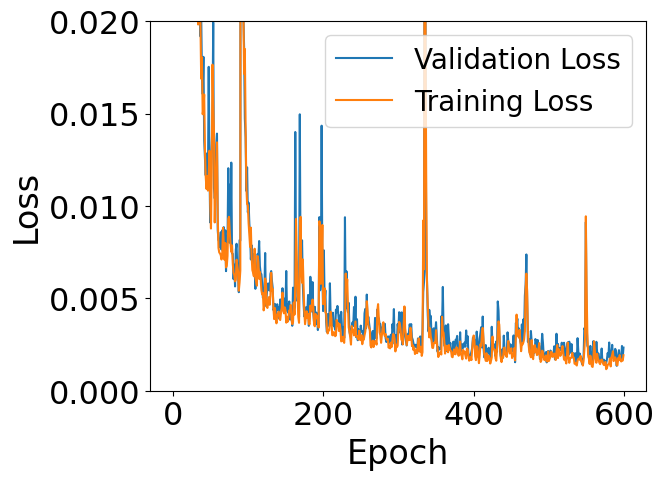

In [19]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Loss', fontsize=24)
plt.ylim((0, 0.02))
plt.tick_params(axis='both', which='major', labelsize=23)
plt.legend(fontsize=20)

In [ ]:
#mlModel.save(prefolder + "savedModel/")

In [20]:
mlModel2.save(prefolder + "savedModel/")

In [ ]:
prefolder

In [21]:
model2 = tf.keras.models.load_model(prefolder + "savedModel/", compile=False)

In [22]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 2)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 100, 400)             324800    ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 dense (Dense)               (None, 32)                   160       ['input_2[0][0]']         

In [23]:
pred = model2.predict([[inputSegments1, inputSegments2]],verbose=None)

In [74]:
pred[:,:,:].shape

(1794, 100, 2)

In [24]:
np.savetxt(prefolder + "predictedTrajX.csv", pred[:,:,0], delimiter=",")
#np.savetxt(prefolder + "predictedTrajY.csv", pred[:,:,1], delimiter=",")
np.savetxt(prefolder + "predictedTrajZ.csv", pred[:,:,1], delimiter=",")

In [ ]:
pred.shape

In [ ]:
xOutput[144,:]